# Rhode Island Police Activity Analysis part 1



In [2]:
# Let's start with simple commands such as: 


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

# Now, let's take a closer look on our dataset: 

ri = pd.read_csv('Desktop/rhode-island-2019-02.csv', low_memory=False)
ri.head()

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,contraband_weapons,contraband_alcohol,contraband_other,frisk_performed,search_conducted,search_basis,reason_for_search,reason_for_stop,vehicle_make,vehicle_model
0,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,...,NaN,NaN,False,False,False,NaN,NaN,Speeding,NaN,NaN
1,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,...,NaN,NaN,False,False,False,NaN,NaN,Speeding,NaN,NaN
2,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,...,NaN,NaN,False,False,False,NaN,NaN,Speeding,NaN,NaN
3,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,...,NaN,NaN,False,False,False,NaN,NaN,Speeding,NaN,NaN
4,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,...,NaN,NaN,False,False,False,NaN,NaN,Speeding,NaN,NaN


## NaN values 

In [12]:
# let's check if there are null values in our dataset
ri.isnull().head()

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,contraband_weapons,contraband_alcohol,contraband_other,frisk_performed,search_conducted,search_basis,reason_for_search,reason_for_stop,vehicle_make,vehicle_model
0,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,True,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,True,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,True,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,True,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,True,True,False,True,True


## Dropping NaN values

In [13]:
# Now we take a look at what columns to drop 
# (or in case there are no columns to drop, it will help us to better understand our dataset, therefore this step is
# helpful)
ri.isnull().sum()

raw_row_number             0
date                      10
time                      10
zone                      10
subject_race           29073
subject_sex            29097
department_id             10
type                       0
arrest_made            29073
citation_issued        29073
warning_issued         29073
outcome                35841
contraband_found      491919
contraband_drugs      493693
contraband_weapons    497886
contraband_alcohol    508464
contraband_other           0
frisk_performed           10
search_conducted          10
search_basis          491919
reason_for_search     491919
reason_for_stop        29073
vehicle_make          191564
vehicle_model         279593
dtype: int64

In [14]:
# in order to know which columns to drop, we need to print the shape of our dataset: 

ri.shape

(509681, 24)

In [ ]:
# in this case there is no column we can drop, because none of the columns is completely empty, but for the 
# purpose of this analysis we will drop three columns: 'contraband_alcohol', 'contraband_weapons', 'search_basis'

## Dropping empty columns and rows

In [15]:
ri.drop('contraband_alcohol', axis='columns', inplace=True)

In [16]:
ri.drop('contraband_weapons', axis='columns', inplace=True) 

In [17]:
ri.drop('search_basis', axis='columns', inplace=True)

In [86]:
# Let's make sure the columns were actually dropped by printing head of the dataset:

ri.head()

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,contraband_weapons,contraband_alcohol,contraband_other,frisk_performed,search_conducted,search_basis,reason_for_search,reason_for_stop,vehicle_make,vehicle_model
0,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,...,NaN,NaN,False,False,False,NaN,NaN,Speeding,NaN,NaN
1,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,...,NaN,NaN,False,False,False,NaN,NaN,Speeding,NaN,NaN
2,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,...,NaN,NaN,False,False,False,NaN,NaN,Speeding,NaN,NaN
3,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,...,NaN,NaN,False,False,False,NaN,NaN,Speeding,NaN,NaN
4,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,...,NaN,NaN,False,False,False,NaN,NaN,Speeding,NaN,NaN


In [19]:
# now we drop NaN rows from columns 'reason_for_search' and 'vehicle_model' to make the analysis easier for us 

ri.dropna(subset=['reason_for_search', 'vehicle_model'], inplace=True)

In [20]:
ri.isnull().head()

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,outcome,contraband_found,contraband_drugs,contraband_other,frisk_performed,search_conducted,reason_for_search,reason_for_stop,vehicle_make,vehicle_model
297,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
634,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1218,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1239,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1299,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Fixing dtypes and correcting formats


In [21]:
# for smoother manipulation with our data, we need to change current data types of some columns in our dataset

ri.dtypes     # in this case, we start with printing the data types first

raw_row_number        int64
date                 object
time                 object
zone                 object
subject_race         object
subject_sex          object
department_id        object
type                 object
arrest_made          object
citation_issued      object
warning_issued       object
outcome              object
contraband_found     object
contraband_drugs     object
contraband_other       bool
frisk_performed      object
search_conducted     object
reason_for_search    object
reason_for_stop      object
vehicle_make         object
vehicle_model        object
dtype: object

In [22]:
# To get answers and draw conclusions from our data we choose to change the data types of 'arrest_made' and 
#'citation_issued' from 'object' to 'bool'(boolean)

ri['arrest_made'] = ri.arrest_made.astype('bool')

In [23]:
ri['citation_issued'] = ri.citation_issued.astype('bool')

In [24]:
#Combine date and time column in "combined" with space in between 


combined = ri.date.str.cat(ri.time, sep=' ')

In [25]:
combined.head()

297     2005-12-06 16:29:00
634     2005-12-07 19:40:00
1218    2005-12-13 08:41:00
1239    2005-12-13 10:41:00
1299    2005-12-08 17:41:00
Name: date, dtype: object

In [26]:
#create a new column called date_and_time from combined, use pandas method to_datetime

ri['date_and_time'] = pd.to_datetime(combined)

In [27]:
ri.head()

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,contraband_found,contraband_drugs,contraband_other,frisk_performed,search_conducted,reason_for_search,reason_for_stop,vehicle_make,vehicle_model,date_and_time
297,298,2005-12-06,16:29:00,K2,black,male,900,vehicular,False,True,...,False,False,False,True,True,Inventory/Tow,Registration Violation,AUDI,100S,2005-12-06 16:29:00
634,635,2005-12-07,19:40:00,K3,white,male,300,vehicular,True,False,...,False,False,False,True,True,Incident to Arrest,Other Traffic Violation,JAGU,STYPE,2005-12-07 19:40:00
1218,1219,2005-12-13,08:41:00,X4,black,female,900,vehicular,True,False,...,False,False,False,False,True,Inventory/Tow,Other Traffic Violation,MAZD,626,2005-12-13 08:41:00
1239,1240,2005-12-13,10:41:00,X4,black,male,900,vehicular,False,True,...,False,False,False,False,True,Inventory/Tow,Other Traffic Violation,ACUR,VIGOR,2005-12-13 10:41:00
1299,1300,2005-12-08,17:41:00,K2,white,male,900,vehicular,False,True,...,False,False,False,False,True,Inventory/Tow,Registration Violation,NISS,MAXIMA,2005-12-08 17:41:00


In [28]:
# let's make sure the column we've created has also the desired data type 

ri.dtypes  

raw_row_number                int64
date                         object
time                         object
zone                         object
subject_race                 object
subject_sex                  object
department_id                object
type                         object
arrest_made                    bool
citation_issued                bool
warning_issued               object
outcome                      object
contraband_found             object
contraband_drugs             object
contraband_other               bool
frisk_performed              object
search_conducted             object
reason_for_search            object
reason_for_stop              object
vehicle_make                 object
vehicle_model                object
date_and_time        datetime64[ns]
dtype: object

## Setting index

In [29]:
#let's set the column date_and_time as an index column

ri.set_index('date_and_time', inplace=True)

In [30]:
ri.head()  

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,outcome,contraband_found,contraband_drugs,contraband_other,frisk_performed,search_conducted,reason_for_search,reason_for_stop,vehicle_make,vehicle_model
date_and_time,,,,,,,,,,,,,,,,,,,,,
2005-12-06 16:29:00,298,2005-12-06,16:29:00,K2,black,male,900,vehicular,False,True,...,citation,False,False,False,True,True,Inventory/Tow,Registration Violation,AUDI,100S
2005-12-07 19:40:00,635,2005-12-07,19:40:00,K3,white,male,300,vehicular,True,False,...,arrest,False,False,False,True,True,Incident to Arrest,Other Traffic Violation,JAGU,STYPE
2005-12-13 08:41:00,1219,2005-12-13,08:41:00,X4,black,female,900,vehicular,True,False,...,arrest,False,False,False,False,True,Inventory/Tow,Other Traffic Violation,MAZD,626
2005-12-13 10:41:00,1240,2005-12-13,10:41:00,X4,black,male,900,vehicular,False,True,...,citation,False,False,False,False,True,Inventory/Tow,Other Traffic Violation,ACUR,VIGOR
2005-12-08 17:41:00,1300,2005-12-08,17:41:00,K2,white,male,900,vehicular,False,True,...,citation,False,False,False,False,True,Inventory/Tow,Registration Violation,NISS,MAXIMA


# 1. Most common outcome of a police stop 

In [18]:
outcomes=ri.outcome.value_counts()
print(outcomes)

# citation or also known as a ticket, is the most common outcome of a police stop

citation    428388
warning      28849
arrest       16603
Name: outcome, dtype: int64


# 2. Most common traffic violation

In [46]:
ri.reason_for_stop.value_counts()         # from 'Call for Service' named as 'other'

Speeding                            2707
Other Traffic Violation             2596
Equipment/Inspection Violation      2157
Registration Violation               854
Seatbelt Violation                   398
Call for Service                     273
Suspicious Person                     51
Special Detail/Directed Patrol        48
APB                                   37
Motorist Assist/Courtesy              34
Violation of City/Town Ordinance      20
Warrant                               16
Name: reason_for_stop, dtype: int64

''

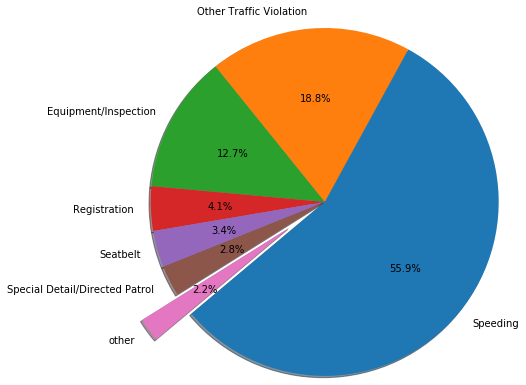

In [47]:
# let's create a visual pie chart to see what are the most common traffic violations

labels = ['Speeding', 'Other Traffic Violation', 'Equipment/Inspection', 'Registration',
'Seatbelt', 'Special Detail/Directed Patrol', 'other']
sizes = [268744,90234,61252,19830,16327,13642,10576]
plt.axis('equal')
plt.pie(sizes, labels=labels, radius=2, autopct='%1.1f%%', shadow=True, startangle=220, explode=[0,0,0,0,0,0,0.5])
;

# 'other' contains = Call for Service, Violation of City/Town Ordinance, Motorist Assist/Courtesy, APB, 
#  Suspicious Person and Warrant


## 3.Comparing violations by gender 

In [61]:
# let's take a closer look at the difference between violations committed by men and violations committed by women, 
# is there a difference? 


female = ri[ri.subject_sex == 'female']
male = ri[ri.subject_sex == 'male']

resultfemale= female.reason_for_stop.value_counts(normalize=True)
print(resultfemale)

resultmale=male.reason_for_stop.value_counts(normalize=True)
print(resultmale)

Speeding                            0.657308
Other Traffic Violation             0.136581
Equipment/Inspection Violation      0.107055
Registration Violation              0.043077
Seatbelt Violation                  0.027071
Call for Service                    0.018057
Special Detail/Directed Patrol      0.005071
Motorist Assist/Courtesy            0.002532
Violation of City/Town Ordinance    0.001647
APB                                 0.000831
Suspicious Person                   0.000564
Warrant                             0.000206
Name: reason_for_stop, dtype: float64
Speeding                            0.522364
Other Traffic Violation             0.206948
Equipment/Inspection Violation      0.135102
Registration Violation              0.040581
Special Detail/Directed Patrol      0.037136
Seatbelt Violation                  0.036555
Call for Service                    0.014987
Violation of City/Town Ordinance    0.002347
Motorist Assist/Courtesy            0.001880
APB              

In [ ]:
# as we can see women are more likely to speed than men, on the other hand they are less likely to commit the
# other two most common violations 'Other Traffic Violation' and 'Equipment/Inspection Violation'

## 4. Does gender affect whether your car will be searched?

In [83]:
female=ri[ri.subject_sex == 'female'].search_conducted.mean()     
print(female)                                                  
male=ri[ri.subject_sex == 'male'].search_conducted.mean()
print(male)                                                 
                                                                
                                                # Women seem to be less likely to have their car searched, but to
                                                # make sure our conclusions are correct, we have to find out the total
                                                # number of searches

femaletotal=ri[ri.subject_sex == 'female'].search_conducted.sum()
maletotal=ri[ri.subject_sex == 'male'].search_conducted.sum()

print(femaletotal)
print(maletotal)

0.018751239152648355
0.04379217389811301
2459
15303


In [ ]:
# ^ We see clearly, that drawing conclusion based on one result can significantly distort overall understanding of out
# data, specifically in this case there were around 6.2 times more men having their car searched than women and 
# therefore the mean of women having their car searched was lower because the total number of women having 
# their car searched was 6.2 times less.

In [16]:
# if we take a closer look on the connection between reason for stop, the search itself and gender we see that the
# most common reason why both genders had their car searched was "Speeding" and "Other Traffic Violation" and 
# eventually "Equipment/Inspection Violation"

#given the proportions there's no significant difference except, women were more likely to be stopped for 
# "Other Traffic Violation" than men

ri.groupby(['subject_sex', 'reason_for_stop']).search_conducted.sum()

subject_sex  reason_for_stop                 
female       APB                                   18
             Call for Service                     100
             Equipment/Inspection Violation       565
             Motorist Assist/Courtesy              11
             Other Traffic Violation              681
             Registration Violation               309
             Seatbelt Violation                    63
             Special Detail/Directed Patrol        12
             Speeding                             667
             Suspicious Person                     16
             Violation of City/Town Ordinance      13
             Warrant                                4
male         APB                                   96
             Call for Service                     484
             Equipment/Inspection Violation      3348
             Motorist Assist/Courtesy              59
             Other Traffic Violation             4278
             Registration Violation 

## 5. Arrest rate

In [79]:
ri.arrest_made.value_counts(normalize=True) 


#We can see the arrest rate is around 3,4 % 

False    0.965454
True     0.034546
Name: arrest_made, dtype: float64

## 6. Arrest rate by district 

In [87]:
ri.zone.unique()

# Let's find out the names of the districts with the .unique() method, we need to know the names of the zones first
# to move on with our analysis

array(['X3', 'X4', 'K3', 'K2', 'K1', 'X1', nan], dtype=object)

In [11]:
# in order to find out which district has the highest arrest rate and which one the lowest we will filter the 
# dataset by each zone 

x3=ri[ri.zone == 'X3'].arrest_made.mean()
print(x3)

x4=ri[ri.zone == 'X4'].arrest_made.mean()
print(x4)

k3=ri[ri.zone == 'K3'].arrest_made.mean()
print(k3)

k2=ri[ri.zone == 'K2'].arrest_made.mean()
print(k2)

k1=ri[ri.zone == 'K1'].arrest_made.mean()
print(k1)

x1=ri[ri.zone == 'X1'].arrest_made.mean()
print(x1)


# as we can see, the highest arrest rate is in the zone X4, on the contrary the lowest arrest rate is in zone K1



all=ri.groupby('zone').arrest_made.sum()     # let's take into consideration the total sum of arrests made in each
                                             # zone
print(all)

0.033353086530183255
0.047289393903225035
0.03201836969001148
0.02812442178409161
0.024047531279137845
0.02616454930429522
zone
K1    1109
K2    2736
K3    3486
X1     346
X3    2983
X4    5943
Name: arrest_made, dtype: int64


In [10]:
# ^ After printing the sum of arrests made we can see our conclusion was not completely correct, the average or the
# mean number of arrests is the lowest in zone K1 but the amount of arrests is the lowest in zone X1. 

#
# 

# To find out more information about the relation between gender and arrest we use the groupby method once again, 
# this time we add a second factor 'subject_sex'

ri.groupby(['zone', 'subject_sex']).arrest_made.sum()  

 

zone  subject_sex
K1    female          213
      male            896
K2    female          549
      male           2187
K3    female          658
      male           2828
X1    female           56
      male            290
X3    female          695
      male           2288
X4    female         1172
      male           4771
Name: arrest_made, dtype: int64

In [ ]:
# Arrests of men seem to be approximately 4-5 times higher than arrests of women in all zones.